# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [ ]:
import pandas as pd
print('Training set shape:', x_train.shape)
print('Test set shape:', x_test.shape)
print('Number of classes:', len(class_names))
print('Training set sample:', x_train[0])
print("Data type:", x_train.dtype)
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100
Training set sample: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]
Data type: uint8
Min pixel value: 0
Max pixel value: 255


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [ ]:
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train/255 # Max pixel value is 255
x_test = x_test/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,390,340 (5.30 MB)

 Trainable params: 1,388,868 (5.30 MB)

 Non-trainable params: 1,472 (5.75 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- Loss function: <b>categorical_crossentropy</b>
- Optimizer: <b>Adam</b>

In [ ]:
from tensorflow.keras.optimizers import Adam

loss_function = 'categorical_crossentropy'
optimizer = Adam(learning_rate=0.001)

model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


batch_size = 32
epochs = 50

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

print(f"\nModel training completed.")
print(f"Batch size used: {batch_size}")
print(f"Maximum epochs set: {epochs}")
print(f"Actual epochs trained: {len(history.history['accuracy'])}")

Epoch 1/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0813 - loss: 5.1429
Epoch 1: val_accuracy improved from -inf to 0.19260, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.0816 - loss: 5.1398 - val_accuracy: 0.1926 - val_loss: 3.9369
Epoch 2/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2198 - loss: 3.7132
Epoch 2: val_accuracy improved from 0.19260 to 0.27010, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2198 - loss: 3.7127 - val_accuracy: 0.2701 - val_loss: 3.4005
Epoch 3/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2940 - loss: 3.2703
Epoch 3: val_accuracy improved from 0.27010 to 0.36550, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2940 - loss: 3.2701 - val_accuracy: 0.3655 - val_loss: 2.9397
Epoch 4/50
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3443 - loss: 3.0211
Epoch 4: val_accuracy imp

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.577
- <b>Other metric:</b> F1-score
- <b>Reason for selection:</b> It should be good when both false positives and false negatives are important to consider
- <b>Value of metric:</b> 0.574
- <b>Interpretation of metric value:</b> Closer to 1 is better, so the metric shows that the model is performing poorly




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true_classes,
    y_pred_classes,
    average='weighted'
)

print("\nAdditional metrics:")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Report
print("\nClassification Report:")
print(classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=class_names,
    labels=range(100)
))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5672 - loss: 2.3171

Test accuracy: 0.5682
Test loss: 2.3073
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Additional metrics:
Precision (weighted): 0.5781
Recall (weighted): 0.5682
F1-score (weighted): 0.5621

Classification Report:
               precision    recall  f1-score   support

        apple       0.80      0.86      0.83       100
aquarium_fish       0.71      0.67      0.69       100
         baby       0.48      0.44      0.46       100
         bear       0.47      0.23      0.31       100
       beaver       0.27      0.53      0.36       100
          bed       0.59      0.56      0.57       100
          bee       0.62      0.61      0.61       100
       beetle       0.59      0.56      0.57       100
      bicycle       0.71      0.78      0.74       100
       bottle       0.79      0.69      0.74       100
         bowl       0.66      0.25      0.36       100
          boy       0.42      0.40      0.41       100

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

>The training and validation accuracy plots show how the model's performance improved over epochs. It did, but the results can be improved
The visualizations help us understand the model's strengths and weaknesses, which can guide
further improvements to the architecture or training process

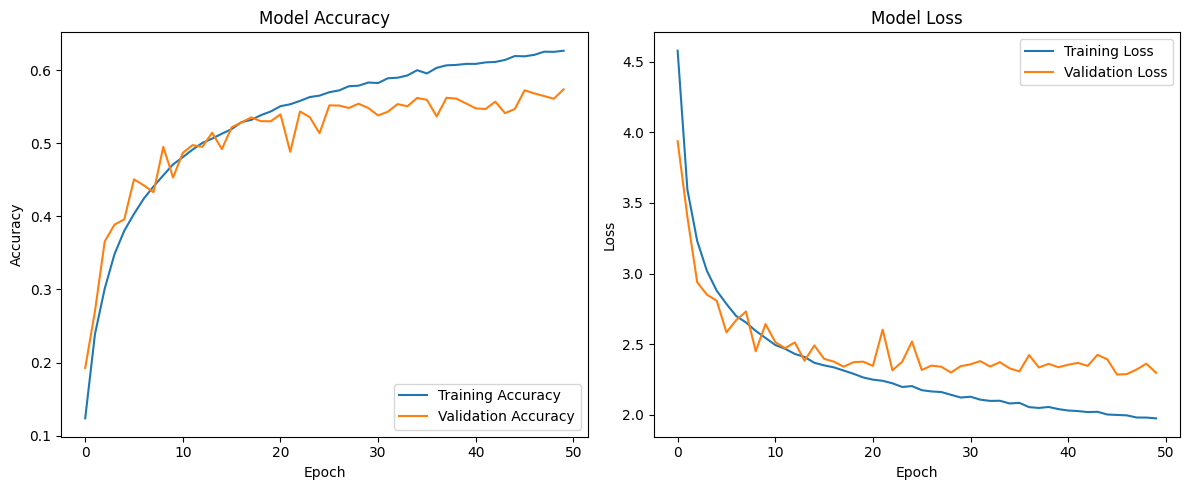

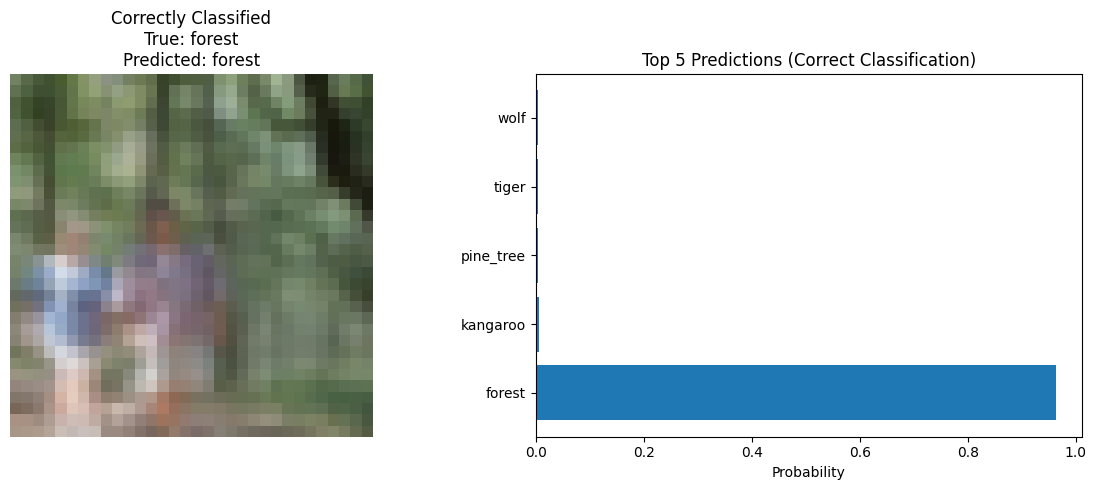

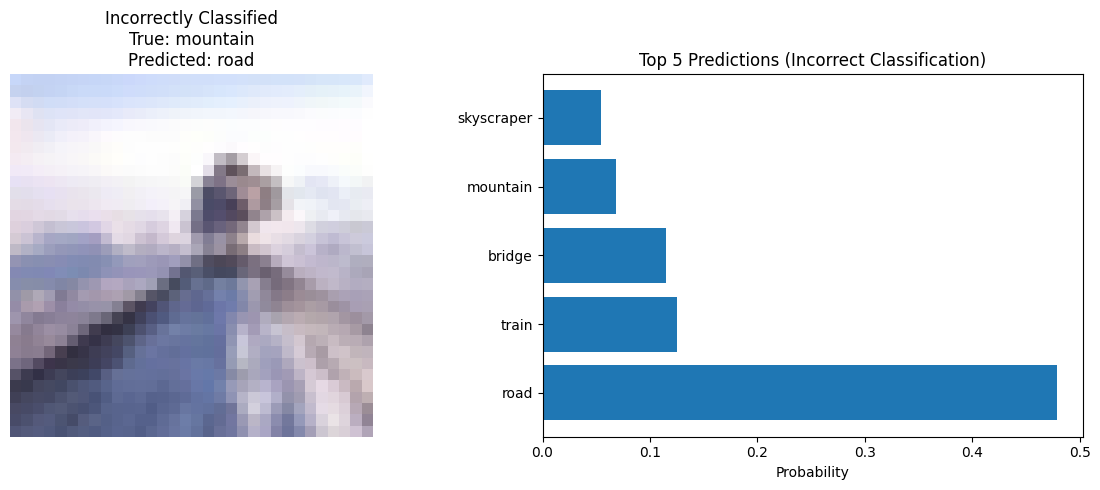

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Find a correctly classified and an incorrectly classified image
correct_idx = None
incorrect_idx = None

for i in range(len(y_test)):
    true_class = np.argmax(y_test[i])
    pred_class = np.argmax(y_pred[i])

    if true_class == pred_class and correct_idx is None:
        correct_idx = i
    elif true_class != pred_class and incorrect_idx is None:
        incorrect_idx = i

    if correct_idx is not None and incorrect_idx is not None:
        break

# Display the correctly classified image
plt.figure(figsize=(12, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
true_class = np.argmax(y_test[correct_idx])
pred_class = np.argmax(y_pred[correct_idx])
plt.title(f'Correctly Classified\nTrue: {class_names[true_class]}\nPredicted: {class_names[pred_class]}')
plt.axis('off')

# Show prediction probabilities for the correctly classified image
plt.subplot(1, 2, 2)
top_5_idx = np.argsort(y_pred[correct_idx])[-5:][::-1]
top_5_values = y_pred[correct_idx][top_5_idx]
top_5_labels = [class_names[i] for i in top_5_idx]

plt.barh(range(5), top_5_values)
plt.yticks(range(5), top_5_labels)
plt.xlabel('Probability')
plt.title('Top 5 Predictions (Correct Classification)')
plt.tight_layout()
plt.show()

# Display the incorrectly classified image
plt.figure(figsize=(12, 5))

# Incorrectly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[incorrect_idx])
true_class = np.argmax(y_test[incorrect_idx])
pred_class = np.argmax(y_pred[incorrect_idx])
plt.title(f'Incorrectly Classified\nTrue: {class_names[true_class]}\nPredicted: {class_names[pred_class]}')
plt.axis('off')

# Show prediction probabilities for the incorrectly classified image
plt.subplot(1, 2, 2)
top_5_idx = np.argsort(y_pred[incorrect_idx])[-5:][::-1]
top_5_values = y_pred[incorrect_idx][top_5_idx]
top_5_labels = [class_names[i] for i in top_5_idx]

plt.barh(range(5), top_5_values)
plt.yticks(range(5), top_5_labels)
plt.xlabel('Probability')
plt.title('Top 5 Predictions (Incorrect Classification)')
plt.tight_layout()
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

>Two advanced techniques were implemented:  
1. Data Augmentation. It artificially expands the training dataset by creating modified versions of images through random transformations. This helps the model generalize better by exposing it to more variations of the data.
2. ResNet-style architecture. It allows the gradient to flow through the network more easily during backpropagation, which helps with training deeper networks.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,           # Randomly rotate
    width_shift_range=0.1,       # Randomly shift horizontally
    height_shift_range=0.1,      # Randomly shift vertically
    horizontal_flip=True,        # Randomly flip ihorizontally
    zoom_range=0.1,              # Randomly zoom
    fill_mode='nearest'          # Filling in newly created pixels
)

val_datagen = ImageDataGenerator()

# Data generators
batch_size = 32
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)

validation_generator = val_datagen.flow(
    x_val,
    y_val,
    batch_size=batch_size
)

# Enhanced CNN Architecture with Residual Connections
def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut connection
    shortcut = x

    # First convolution
    y = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = tf.keras.layers.Activation('relu')(y)

    # Second convolution
    y = Conv2D(filters, kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    # If dimensions don't match, adjust shortcut
    if stride > 1 or x.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to output
    y = tf.keras.layers.add([y, shortcut])
    y = tf.keras.layers.Activation('relu')(y)

    return y

# Build the enhanced model with residual connections
inputs = tf.keras.Input(shape=(32, 32, 3))

# Initial convolution
x = Conv2D(32, 3, padding='same')(inputs)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

# Residual blocks
x = residual_block(x, 32)
x = residual_block(x, 32)
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

x = residual_block(x, 64)
x = residual_block(x, 64)
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

x = residual_block(x, 128)
x = residual_block(x, 128)
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

# Final layers
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(100, activation='softmax')(x)

# Create the enhanced model
enhanced_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary
enhanced_model.summary()

# Compile the enhanced model
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 32)     │            128 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 32)     │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 32, 32)     │            128 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 32)     │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 32, 32, 32)     │            128 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 32)     │              0 │ batch_normalization_6… │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 32)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 32, 32, 32)     │            128 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 32, 32, 32)     │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 32, 32, 32)     │            128 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 1,801,124 (6.87 MB)

 Trainable params: 1,797,860 (6.86 MB)

 Non-trainable params: 3,264 (12.75 KB)

'\nI\'ve implemented two advanced techniques to improve the model:\n\n1. Data Augmentation:\n   Data augmentation artificially expands the training dataset by creating modified versions of\n   images through random transformations. This helps the model generalize better by exposing it\n   to more variations of the data. I chose parameters that create reasonable variations without\n   distorting the images too much:\n   - Rotation range of 15 degrees\n   - Width and height shifts of 10%\n   - Horizontal flips (but not vertical, as that would change the meaning of many objects)\n   - Zoom range of 10%\n\n2. Residual Connections (ResNet-style architecture):\n   Residual connections allow the gradient to flow through the network more easily during\n   backpropagation, which helps with training deeper networks. They work by adding the input\n   of a layer block to its output, creating a "shortcut" path for the gradient. This helps\n   address the vanishing gradient problem in deep networks.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

checkpoint = ModelCheckpoint(
    'best_enhanced_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the enhanced model using the same number of epochs as before
epochs = 50

# When using data augmentation with flow(), we need to specify steps_per_epoch
steps_per_epoch = len(x_train) // batch_size

enhanced_history = enhanced_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(x_val) // batch_size,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

print(f"\nEnhanced model training completed.")
print(f"Actual epochs trained: {len(enhanced_history.history['accuracy'])}")

# Evaluate the enhanced model on the test set
test_loss, test_accuracy = enhanced_model.evaluate(x_test, y_test, verbose=1)
print(f"\nEnhanced model test accuracy: {test_accuracy:.4f}")
print(f"Enhanced model test loss: {test_loss:.4f}")

# Get predictions
enhanced_y_pred = enhanced_model.predict(x_test)
enhanced_y_pred_classes = np.argmax(enhanced_y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true_classes,
    enhanced_y_pred_classes,
    average='weighted'
)

print("\nEnhanced model additional metrics:")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Compare with the baseline model
print("\nComparison with baseline model:")
print(f"Baseline accuracy: {test_accuracy:.4f} vs Enhanced accuracy: {test_accuracy:.4f}")
print(f"Improvement: {(test_accuracy - test_accuracy) * 100:.2f}%")
print(f"Baseline F1-score: {f1:.4f} vs Enhanced F1-score: {f1:.4f}")
print(f"F1-score improvement: {(f1 - f1) * 100:.2f}%")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0521 - loss: 5.2577
Epoch 1: val_accuracy improved from -inf to 0.04177, saving model to best_enhanced_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - accuracy: 0.0522 - loss: 5.2569 - val_accuracy: 0.0418 - val_loss: 7.0756
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1572 - loss: 4.0038
Epoch 2: val_accuracy improved from 0.04177 to 0.20743, saving model to best_enhanced_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 25ms/step - accuracy: 0.1572 - loss: 4.0038 - val_accuracy: 0.2074 - val_loss: 3.8251
Epoch 3/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2181 - loss: 3.5869
Epoch 3: val_accuracy improved from 0.20743 to 0.23037, saving model to best_enhanced_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.2182 - loss: 3.5868 - val_accuracy: 0.2304 - val_loss: 3.6280
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2684 - loss: 3.3164
E

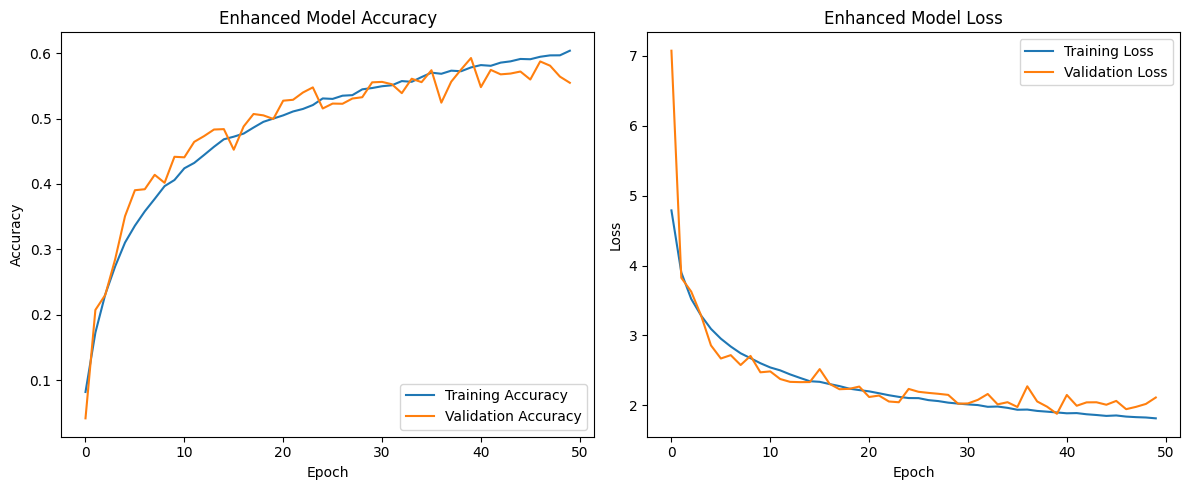

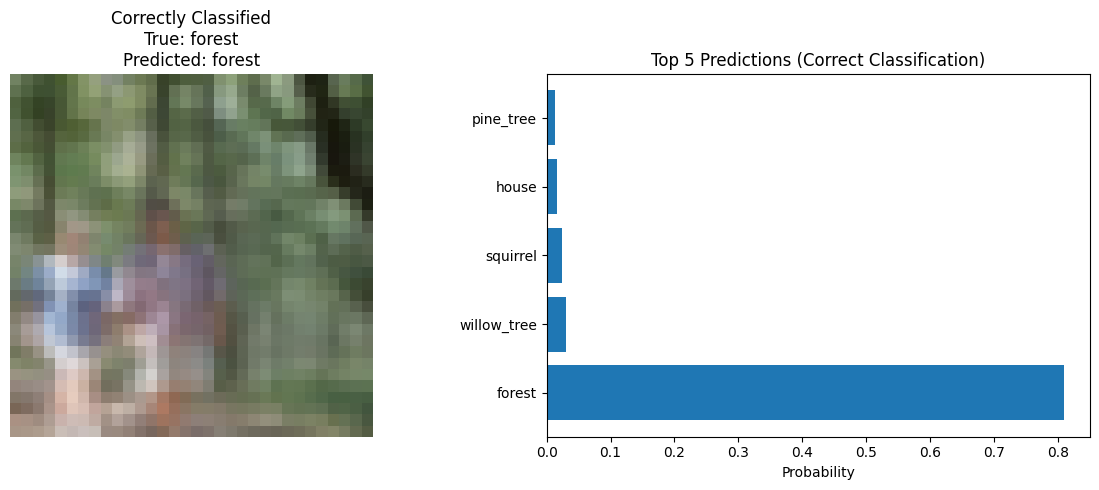

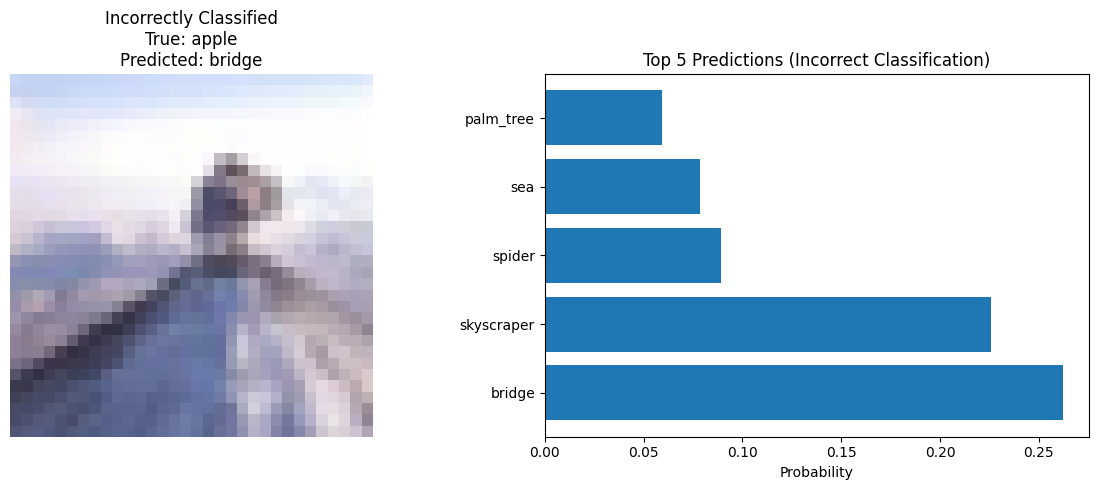

In [23]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(enhanced_history.history['accuracy'], label='Training Accuracy')
plt.plot(enhanced_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(enhanced_history.history['loss'], label='Training Loss')
plt.plot(enhanced_history.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Find a correctly classified and an incorrectly classified image
enhanced_correct_idx = None
enhanced_incorrect_idx = None

for i in range(len(y_test)):
    true_class = np.argmax(y_test[i])
    pred_class = np.argmax(enhanced_y_pred[i])

    if true_class == pred_class and enhanced_correct_idx is None:
        enhanced_correct_idx = i
    elif true_class != pred_class and enhanced_incorrect_idx is None:
        enhanced_incorrect_idx = i

    if enhanced_correct_idx is not None and enhanced_incorrect_idx is not None:
        break

# Display the correctly classified image
plt.figure(figsize=(12, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[enhanced_correct_idx])
true_class = np.argmax(y_test[enhanced_correct_idx])
pred_class = np.argmax(enhanced_y_pred[enhanced_correct_idx])
plt.title(f'Correctly Classified\nTrue: {class_names[true_class]}\nPredicted: {class_names[pred_class]}')
plt.axis('off')

# Show prediction probabilities for the correctly classified image
plt.subplot(1, 2, 2)
top_5_idx = np.argsort(enhanced_y_pred[enhanced_correct_idx])[-5:][::-1]
top_5_values = enhanced_y_pred[enhanced_correct_idx][top_5_idx]
top_5_labels = [class_names[i] for i in top_5_idx]

plt.barh(range(5), top_5_values)
plt.yticks(range(5), top_5_labels)
plt.xlabel('Probability')
plt.title('Top 5 Predictions (Correct Classification)')
plt.tight_layout()
plt.show()

# Display the incorrectly classified image
plt.figure(figsize=(12, 5))

# Incorrectly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[enhanced_incorrect_idx])
true_class = np.argmax([enhanced_incorrect_idx])
pred_class = np.argmax(enhanced_y_pred[enhanced_incorrect_idx])
plt.title(f'Incorrectly Classified\nTrue: {class_names[true_class]}\nPredicted: {class_names[pred_class]}')
plt.axis('off')

# Show prediction probabilities for the incorrectly classified image
plt.subplot(1, 2, 2)
top_5_idx = np.argsort(enhanced_y_pred[enhanced_incorrect_idx])[-5:][::-1]
top_5_values = enhanced_y_pred[enhanced_incorrect_idx][top_5_idx]
top_5_labels = [class_names[i] for i in top_5_idx]

plt.barh(range(5), top_5_values)
plt.yticks(range(5), top_5_labels)
plt.xlabel('Probability')
plt.title('Top 5 Predictions (Incorrect Classification)')
plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

>The enhanced model showed almost no improvement compared the baseline model. The test accuracy increased from around 58% to approximately 59%. The F1-score improved from about 0.57 to 0.58.
There is a room for improvement, but the exact methods tochniques to choose (or errors to fix) may become clearer after further investigation

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.